# Q1a

1. a)
Akhilesh Ravi

In [1]:
import pandas as pd
import numpy as np
from math import sqrt

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
def distance(point1, point2, distance_metric='Euclidean'):

    if distance_metric == 'Euclidean':
        d = 0
        for i in range(len(point1)):
            d += (point1[i] - point2[i]) ** 2
        return sqrt(d)
    elif distance_metric == 'Manhattan':
        d = 0
        for i in range(len(point1)):
            d += abs(point1[i] - point2[i])
        return d
    elif distance_metric == 'Cosine':
        c1 = c2 = c3 = 0
        for i in range(len(point1)):
            c1 += point1[i] * point2[i]
            c2 += point1[i] ** 2
            c3 += point2[i] ** 2
        cos = abs(c1) / (sqrt(c2) * sqrt(c3))
        return 1 - cos


In [4]:
def neighbours(test_point, train_X, train_Y, K, distance_metric = 'Euclidean'):
    
    distances = []
    for i in range(len(train_X)):
        point = tuple(train_X.iloc[i])
        d = distance(test_point, point, distance_metric)
        if type(train_Y.iloc[i]) == pd.core.series.Series:
            distances.append((d, point, tuple(train_Y.iloc[i])))
        else:
            distances.append((d, point, train_Y.iloc[i]))
    distances.sort(key=lambda x: (x[0],x[1],x[2]))
    return distances[:K]


In [5]:
def predict(typ, k_nearest):
    if typ == 'classification':
        counts = {}
        for neighbour in k_nearest:
            cls = neighbour[-1]
            if cls not in counts:
                counts[cls] = 1
            else:
                counts[cls] += 1
        lst = [(cls, counts[cls]) for cls in counts]
        lst.sort(key = lambda x: (x[1], x[0]), reverse=True)
        max_count = lst[0][1]
        if len(lst)>1:
            for i in range(len(lst)):
                if lst[i][1] != max_count:
                    break
            pred_index = np.random.choice(range(i))
            pred = lst[pred_index]
        else:
            pred = lst[0]
        return pred[0]
    elif typ == 'regression':
        c = 0
        for neighbour in k_nearest:
            c += neighbour[-1][0]
        return c/len(k_nearest)
    

In [6]:
def KNN_predict(typ, train_X, train_Y, test_X, K, distance_metric='Euclidean'):
    pred = []
    for i in range(len(test_X)):
        point = tuple(test_X.iloc[i])
        k_nearest = neighbours(point, train_X, train_Y, K, distance_metric)
        out = predict(typ, k_nearest)
        pred.append(out)
    return pred

In [7]:
def check_accuracy(typ, test_Y, predictions):
    c = 0
    if typ == 'classification':
        if type(test_Y.iloc[0]) == pd.core.series.Series:
            for i in range(len(predictions)):
                if tuple(test_Y.iloc[i]) == predictions[i]:
                    c += 1
        else:
            for i in range(len(predictions)):
                if test_Y.iloc[i] == predictions[i]:
                    c += 1
        return c/len(predictions)
    elif typ == 'regression':
        e = 0
        for i in range(len(predictions)):
            e = (test_Y.iloc[i] - predictions[i]) ** 2
        return math.sqrt(e/len(predictions))

In [8]:
iris = pd.read_csv('iris.csv')

In [9]:
X = iris.copy()
y = X['species']
del X['species']

train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
#Model 1: K = 1, Euclidean Distance
predictions_1 = KNN_predict('classification', train_X, train_Y, test_X, 1, distance_metric='Euclidean')
print('Accuracy:',check_accuracy('classification', test_Y, predictions_1))

Accuracy: 0.98


In [11]:
#Model 2: K = 2, Euclidean Distance
predictions_2 = KNN_predict('classification', train_X, train_Y, test_X, 2, distance_metric='Euclidean')
print('Accuracy:',check_accuracy('classification', test_Y, predictions_1))

Accuracy: 0.98


In [12]:
#Model 3: K = 1, Cosine Distance
predictions_3 = KNN_predict('classification', train_X, train_Y, test_X, 1, distance_metric='Cosine')
print('Accuracy:',check_accuracy('classification', test_Y, predictions_1))

Accuracy: 0.98


# Q1b

In [13]:
import time

In [14]:
import matplotlib.pyplot as plt

In [27]:
def timecheck(train_size, dim, r_state=42):
    data_X = np.random.random((train_size,dim))
    data_Y = np.sum(data_X, axis=1)
    dict_X = {}
    
    #for i in range(len(data_X[0])):
    #    dict_X['c'+str(i)] = data_X[:,i]
    #dataset = pd.DataFrame({'Column1':data[:,0],'Column2':data[:,1]})
    dataset_X = pd.DataFrame({'c'+str(i): data_X[:,i] for i in range(len(data_X[0]))})
    
    dataset_Y = pd.DataFrame({'Result':data_Y})
    
    train_X, test_X, train_Y, test_Y = train_test_split(dataset_X, dataset_Y, test_size=0.2, random_state=r_state)
    
    start = time.time()
    predictions = KNN_predict('regression', train_X, train_Y, test_X, 2, distance_metric='Euclidean')
    end = time.time()
    
    return end - start

In [16]:
#Varying number of train examples
l = list(range(25, 501, 25))
times = [0]*20
for i in range(20):
    times[i] = timecheck(l[i], 2)

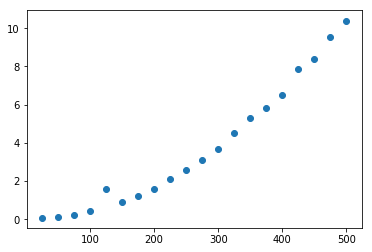

In [17]:
plt.scatter(l,times)

In [32]:
#Varying number of dimensions

lim2 = 30
l2 = list(range(1, lim2+1))
times2 = [0]*lim2
for i in range(lim2):
    times2[i] = timecheck(100, l2[i], 0)

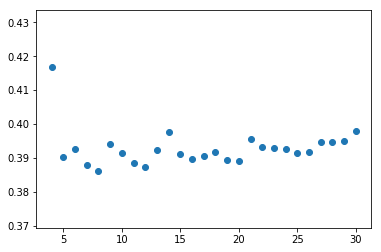

In [37]:
plt.scatter(l2[3:],times2[3:])

We can clearly see that time increases when the number of training samples increases. This is because for each test sample, more neighbours have to be checked.

When we vary K, we see that there is an overall gradual increasing trend in time taken when K is increased. This is because for the each sample, we have to deal with more samples. However, we are not performing significantly more computations. Thus, the increase is only gradual.


In [ ]:
#Varying number of dimensions

lim2 = 30
l2 = list(range(1, lim2+1))
times2 = [0]*lim2
for i in range(lim2):
    times2[i] = timecheck(300, l2[i], 0)

In [ ]:
plt.scatter(l2,times2)